referencia: http://blog.marcinchwedczuk.pl/iterative-algorithm-for-drawing-hilbert-curve

In [2]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from pathlib import PurePath

In [32]:
def plot(img):
    plt.imshow(img)
    plt.show()

In [78]:
def index2xy(index, N, im_size=None):
    
    if im_size == None or N > im_size:
        N = im_size
        
    # x, y positions in N=2
    positions = [
        [0,0],
        [0,1],
        [1,1],
        [1,0]
    ]
    
    # last 2 bits = position in N=2
    x, y = positions[ index&3 ]
    
    # next 2 bits = position in current N
    index = index >> 2
    
    n=4
    while n <= N:
        n2 = n//2
        
        h = index&3
        
        # Bottom left
        if h == 0:
            x, y = y, x
            
        # Upper left
        elif h == 1:
            x, y = x, y+n2
            
        # Upper right
        elif h == 2:
            x, y = x+n2, y+n2

        # Bottom right
        elif h == 3:
            x, y  = 2*n2-1-y, n2-1-x
            
        index = index >> 2
        n *= 2
        
    
    x, y = im_size//N*x, im_size//N*y
        
    return x, y


In [82]:
def hilbert_order(N, size=None):
    img_curve = []

    for i in range(N*N):
        pixel_coord = index2xy(i, N, size)
        img_curve.append(pixel_coord)
    
    return np.asarray(img_curve)

In [92]:
im_size = 128
blank = np.ones(shape=(im_size,im_size))
N=32

In [93]:
curve = hilbert_order(N, im_size)
im_blank = Image.fromarray(blank)
draw = ImageDraw.Draw(im_blank)

draw.line(list(curve.flatten()), width=1, fill=128)


In [95]:
curve

array([[  0,   0],
       [  0,   4],
       [  4,   4],
       ...,
       [120,   4],
       [124,   4],
       [124,   0]])

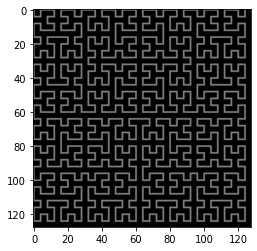

In [96]:
plot(im_blank)